# Анализ авторских профилей ВК и построение прогнозной модели 

Для выполнения проекта была поставлена задача построить модель классификатора, который бы мог потенциально определить фейковую анкету среди остальных.

## Загрузка библиотек

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
import re

## Описание данных

В исходных данных содержится адрес блога, никнейм, вся информация, которую пользователь указал о себе (местонахождение, дата рождения, образование и тд), а также тексты в блоге. Материал - 2100 случайных авторских профилей из старого Живого Журнала (из нового пока недостаточно данных, т.ею это с качивание 2014 года). 
Ссылка: https://drive.google.com/drive/folders/0B600DBw1ZmZAMHA2SXFEc0ROSEk

### Список переменных

In [8]:
print(data.columns.values)

['city_title' 'first_name' 'last_name' 'screen_name' 'can_see_all_posts'
 'has_mobile' 'country_id' 'country_title' 'online' 'sex' 'photo_medium'
 'bdate' 'can_post' 'home_phone' 'photo' 'can_write_private_message'
 'activity' 'nickname' 'id_1' 'photo_big' 'platform' 'time'
 'university_name' 'faculty' 'relation' 'country'
 'universities_university_id' 'name' 'city' 'education_form' 'graduation'
 'chair_name' 'faculty_name' 'universities_university_faculty' 'chair'
 'education_status' 'faculty_name_1' 'online_mobile' 'university'
 'graduation_1' 'online_app' 'videos' 'notes' 'audios' 'photos' 'followers'
 'albums' 'gifts' 'groups' 'user_videos' 'education_form_1'
 'education_status_1' 'relation_partner_first_name'
 'relation_partner_last_name' 'relation_partner_id' 'hidden'
 'status_audio_title' 'url' 'artist' 'lyrics_id' 'date' 'duration'
 'status_audio_id' 'owner_id' 'genre_id' 'album_id' 'no_search'
 'deactivated']


1. 'city_title' - название города, в котором находится пользователь, as is
+ 'first_name' - имя
+ 'last_name' - фамилия
+ 'screen_name' - айди вконтакте или адрес странички
+ 'can_see_all_posts' - 0 или 1, настройка приватности
+ 'has_mobile' - 0 или 1, заходил ли в вк с телефона
+ 'country_id' - цифровой код страны, в которой находится пользователь, as is 
+ 'country_title' - название страны, в которой находится пользователь, as is
+ 'online' - 0 или 1, был ли онлайн во время скачивания (перекос в сторону "1", так как скачивался прямой эфир)
+ 'sex' - 1 (мужской), 2 (женский), 0 (не указано)
+ 'photo_medium' - ссылка на фотографию (аватар)
+ 'bdate' - дата рождения
+ 'can_post' - 0 или 1 - можно ли другим юзерам писать на стене
+ 'home_phone' - домашний телефон
+ 'photo' - аватар
+ 'can_write_private_message' - 0 или 1, могут ли пользователи писать личные сообщения
+ 'activity' - статус, as is
+ 'nickname' - никнейм (ставится между именем и фамилией)
+ 'id_1' - айди вконтакте, уникальный, есть у каждого, без маски-ссылки на стр
+ 'photo_big' - аватарка, большой размер
+ 'platform' - платформа, с кот. пользователь сидит, 0 до 7: 1-mobile, 2-iphone, 3-ipad, 4-android, 5-wphone, 6-windows, 7-web
+ 'time' - время последнего захода пользователя онлайн
+ 'university_name' - название университета
+ 'faculty' - айди факультета
+ 'relation' - семейное положение, от 0 до 7: 1 – single, 2 – in a relationship, 3 – engaged, 4 – married, 5 – it's complicated, 6 – actively searching, 7 – in love
+ 'country' - название страны местонахождения университета
+ 'universities_university_id' - уникальный айди университета
+ 'name' - офиц.название университета
+ 'city' - айди города, к которому университет привязан
+ 'education_form' - форма обучения
+ 'graduation' - год окончания
+ 'chair_name' - специализация
+ 'faculty_name' - название факультета
+ 'universities_university_faculty' - айди факультета в указанном университете
+ 'chair' - university chair ID
+ 'education_status' - статус учащегося
+ 'faculty_name_1'  - не удалось выяснить, в документации и в таблице NaN
+ 'online_mobile' - выходил ли онлайн с мобильного во время скачивания. None или 1
+ 'university' - айди университета
+ 'graduation_1'  - не удалось выяснить, в документации и в таблице NaN
+ 'online_app' - есть ли моб.приложение - его версия
+ 'videos' - счетчик видео на странице
+ 'notes'  - счетчик заметок на странице
+ 'audios'  - счетчик аудио на странице
+ 'photos'  - счетчик фото на странице
+ 'followers' - счетчик фолловеров на странице
+ 'albums'  - счетчик альбомов на странице
+ 'gifts'  - счетчик подарков на странице
+ 'groups'  - счетчик групп на странице
+ 'user_videos'  - счетчик загруженных видео на странице
+ 'education_form_1' - не удалось выяснить, в документации и в таблице NaN
+ 'education_status_1'  - не удалось выяснить, в документации и в таблице NaN
+ 'relation_partner_first_name' - имя партнера
+ 'relation_partner_last_name' - фамилия партнера
+ 'relation_partner_id' - ай вк партнера
+ 'hidden' - скрыт ли профиль, 1 или None
+ 'status_audio_title' - если в статусе аудио, то его заголовок
+ 'url' - ссылка на аудио в статусе
+ 'artist' - исполнитель
+ 'lyrics_id' - айди документа с текстов аудио
+ 'date' - дата
+ 'duration' - длительность
+ 'status_audio_id' - айди аудио вк
+ 'owner_id' - айди пользователя, залившего аудио
+ 'genre_id' - айди жанра
+ 'album_id' - айди альбома
+ 'no_search' - 1 или None. Запретил ли пользователь в настройках приватности индексировать свою страничку поисковикам
+ 'deactivated' - принимает значения 'banned' или 'deleted' соответственно.



In [180]:
data = pd.read_csv(r'G:\GICRL_Knowledge_Base\достоверность_профилей\для_выборки\VK\final_vkprofiles.csv', sep=';',  encoding='utf-8')
data.head()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,12,15,18,23,24,25,26,33,34,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city_title,first_name,last_name,screen_name,can_see_all_posts,has_mobile,country_id,country_title,online,sex,...,artist,lyrics_id,date,duration,status_audio_id,owner_id,genre_id,album_id,no_search,deactivated
0,Кингисепп,Maria,Maria,id95596964,0,1,1,Россия,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ахтырка,Женя,Кузнецова,id228580388,1,1,2,Украина,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Кореновск,Валерий,Тарасов,id342844772,1,1,1,Россия,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Винница,Виктория,Левченко,id299763940,1,1,2,Украина,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Braga,Vrat,Zart,id348030308,1,1,161,Португалия,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Первичный анализ признаков

In [181]:
data.describe()

,online,city,graduation,online_mobile,university,graduation_1,online_app,videos,notes,audios,...,relation_partner_id,hidden,lyrics_id,date,duration,status_audio_id,owner_id,genre_id,album_id,no_search
count,38629.000000,3.463000e+03,2238.000000,1.958700e+04,2.673200e+04,26731.000000,1.563700e+04,12558.000000,12558.000000,12558.000000,...,1.010000e+03,4467.0,6.490000e+02,9.790000e+02,979.000000,9.790000e+02,9.790000e+02,888.000000,9.300000e+01,8.0
mean,10.352585,4.200061e+05,1979.058981,2.946125e+03,9.606458e+03,164.075343,2.605871e+06,27.731645,0.188645,32.121835,...,1.856830e+08,1.0,1.626588e+08,1.437046e+09,338.854954,3.942120e+08,4.713181e+08,187.222973,1.479887e+07,1.0
std,149.456755,9.953007e+06,229.595072,4.121808e+05,8.251841e+04,549.813525,6.324184e+05,149.142070,4.325291,116.205629,...,1.142776e+08,0.0,1.141100e+08,3.947871e+07,904.503654,9.138278e+07,6.371296e+08,375.966071,2.440976e+07,0.0
min,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,1.804162e+06,0.000000,0.000000,0.000000,...,1.010000e+02,1.0,7.035000e+03,1.222531e+09,7.000000,4.417293e+07,-1.107841e+08,1.000000,2.000000e+00,1.0
25%,1.000000,1.900000e+01,2002.000000,1.000000e+00,0.000000e+00,0.000000,2.274003e+06,0.000000,0.000000,0.000000,...,1.030795e+08,1.0,3.217490e+07,1.443018e+09,195.000000,4.003817e+08,1.348692e+08,14.000000,2.000000e+00,1.0
50%,1.000000,1.330000e+02,2009.000000,1.000000e+00,0.000000e+00,0.000000,2.274003e+06,0.000000,0.000000,0.000000,...,1.843972e+08,1.0,1.860167e+08,1.454572e+09,222.000000,4.368743e+08,3.071119e+08,18.000000,3.000000e+00,1.0
75%,1.000000,5.530000e+02,2014.000000,1.000000e+00,0.000000e+00,0.000000,2.685278e+06,9.000000,0.000000,17.000000,...,2.750678e+08,1.0,2.665929e+08,1.455605e+09,260.500000,4.408317e+08,3.483848e+08,18.000000,2.810912e+07,1.0
max,9726.000000,3.501442e+08,2023.000000,5.768617e+07,1.177093e+06,2023.000000,5.316500e+06,5558.000000,420.000000,3545.000000,...,1.661993e+09,1.0,3.169076e+08,1.457200e+09,22034.000000,4.562399e+08,2.000498e+09,1001.000000,7.058570e+07,1.0


In [182]:
#Посмотрим, сколько у нас пользователей:
print("Столько пользователей в таблице: ", data.shape[0])

Столько пользователей в таблице:  38751


In [85]:
# посмотрим самые частотные города
data['city_title'].value_counts().head(20)

Москва             2750
Санкт-Петербург    1386
Киев                693
Екатеринбург        380
Алматы              365
Новосибирск         323
Казань              315
Самара              305
Уфа                 305
Нижний Новгород     297
Харьков             282
Челябинск           277
Краснодар           264
Минск               262
Омск                262
Ростов-на-Дону      256
Пермь               248
Красноярск          245
Волгоград           245
Днепропетровск      232
Name: city_title, dtype: int64

In [86]:
# посмотрим самые частотные страны
data['country_title'].value_counts().head(20)

Россия            19255
Украина            4734
Казахстан          1877
Беларусь            976
США                 261
Молдова             123
Германия            100
Азербайджан          75
Узбекистан           67
Кыргызстан           66
Япония               62
Армения              60
Латвия               44
Великобритания       44
Южная Корея          38
Испания              37
Турция               33
Грузия               31
Эстония              30
Израиль              30
Name: country_title, dtype: int64

In [15]:
data['bdate'].value_counts().head(20)

01.янв    81
0         65
06.июн    44
05.фев    41
01.фев    40
05.май    40
18.фев    38
07.фев    38
14.фев    37
13.мар    37
31.дек    37
10.фев    37
09.июн    36
27.мар    36
15.июл    36
23.авг    36
03.мар    36
02.фев    35
08.мар    35
25.июн    35
Name: bdate, dtype: int64

In [89]:
# посмотрим распределение полов
# 1 - мужчина, 2 - женщина, 0 - неизвестно
data['sex'].value_counts().head(10)

1                     20497
2                     17781
0                       108
2274003                  44
3140623                  10
Дневное отделение         9
3502561                   3
3698024                   3
Вечернее отделение        3
2685278                   1
Name: sex, dtype: int64

Поскольку таблица очень большая, а в статусах юзеров нередко встречаются запятые, столбцы на конце таблицы иногда сбиваются. Но мы почистим основные признаки, сделав drop пустых/бесполезных/неправильных значений

In [183]:
data = data.drop('education_status_1', 1)
data = data.drop('education_form_1', 1)
data = data.drop('faculty_name_1', 1)
data = data.drop('graduation_1', 1)


In [185]:
#почистим поле пола, оставив лишь три значения: 0,1,2
data = data[(data['sex']== '0' )|(data['sex']=='1') |(data['sex']=='2')|(data['sex']==None)]

In [186]:
data['sex'].value_counts()

1    20497
2    17781
0      108
Name: sex, dtype: int64

In [187]:
data['sex_num'] = data['sex'].astype(float)

In [188]:
data['can_post1'] = data['can_post'].astype(float, skipbad = True)

ValueError: could not convert string to float: 'Марина'

In [190]:
#то же самое сделаем с relation, оставив лишь 0-7
data = data[(data['relation']== '0' )|(data['relation']=='1') |(data['relation']=='2')|(data['relation']=='3')|(data['relation']=='4')|(data['relation']=='5')|(data['relation']=='6')|(data['relation']=='7')|(data['relation']==None)]

In [191]:
data['relation'].value_counts()

0    3772
4     697
6     429
1     356
7     257
2     114
5      71
3      37
Name: relation, dtype: int64

### Первичный визуальный анализ признаков

То же самое, что в предыдущей части, но визуально. Здесь строятся гистограммы распределения признаков, диаграммы рассеяния, бокс-плоты, матрицы корреляций и т.д. Отдельно надо поизучать, как целевой признак зависит от других. Очень полезно диаграммы рассеяния раскрашивать в зависимости от целевого класса (если это задача классификации). Плюсом будет PCA- или tSNE-представление данных и попытки интерпретации.

In [172]:
# посмотрим, как распределены дни рождения по годам- не смещена ли выборка. Известно, что средний возраст юзера ВК - 25-30 лет. 
# т.е. годы рождения должны центрироваться вокруг отметки 1985-1990
# создадим новый признак - Birth_year
def birth_year(age):
    if re.search(r'\d{4}', str(age)):
        result = re.search(r'\d{4}', str(age))
        #print(result.group(0))
        return int(result.group(0))
    else:
        return None

In [192]:
birth_years = [birth_year(age) for age in data.bdate]

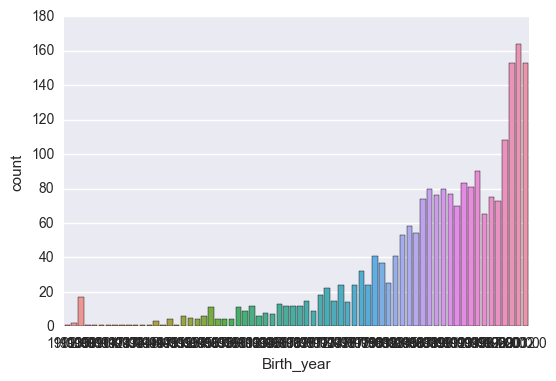

In [193]:
data['Birth_year'] = birth_years
#data['Birth_year'].hist(normed=True)
#plt.title('Birth year statistics')
#plt.show()
sns.countplot(x = data['Birth_year'])

In [194]:
data['Birth_year'].describe()

count    2193.000000
mean     1988.447332
std        14.538807
min      1902.000000
25%      1984.000000
50%      1992.000000
75%      1999.000000
max      2002.000000
Name: Birth_year, dtype: float64

Видим, что данные распределены не нормально: хотя пик колокола и приходится на 1988й, но очень много людей начиная с 1995года рождения.

То же самое сдлаем для месяцев рождения.
Создадим новый признак birth_month

In [195]:
def birth_month(age):
    if re.search(r'[а-яё]{3}', str(age)):
        result = re.search(r'[а-яё]{3}', str(age))
        return result.group(0)
        print(result)
    else:
        return None

In [196]:
birth_month = [birth_month(age) for age in data.bdate]

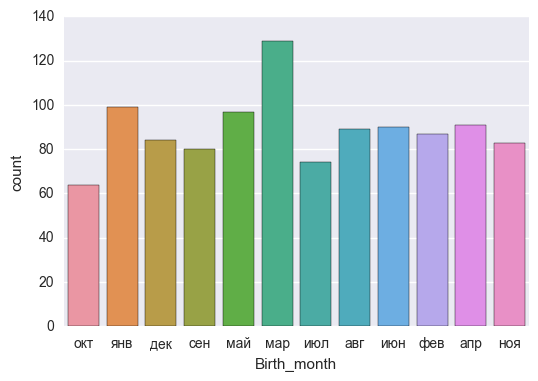

In [197]:
data['Birth_month'] = birth_month
a = data['Birth_month'].value_counts().head(12)
sns.countplot(x = data['Birth_month'])

Теперь посмотрим, сколько признаков (имя, дата рождения, местоположение, образование) приходится в среднем на пользователя

In [184]:
# для этого создадим новый признак 'Info_count'
for i in range(data.shape[0]):
    #print (i)
    data.at[i,'Info_count'] = len(data.loc[i, ['city_title','first_name','last_name','screen_name','can_see_all_posts','has_mobile','country_id','country_title','online','sex','photo_medium', 'bdate','can_post','home_phone','photo','can_write_private_message', 'activity','nickname','id_1','photo_big','platform','time', 'university_name','faculty','relation','country', 'universities_university_id','name','city','education_form','graduation', 'chair_name','faculty_name','universities_university_faculty','chair', 'education_status','online_mobile','university','online_app','videos','notes','audios','photos','followers', 'albums','gifts','groups','user_videos','relation_partner_first_name', 'relation_partner_last_name','relation_partner_id','hidden', 'status_audio_title','url','artist','lyrics_id','date','duration','status_audio_id','owner_id','genre_id','album_id','no_search','deactivated']].dropna())

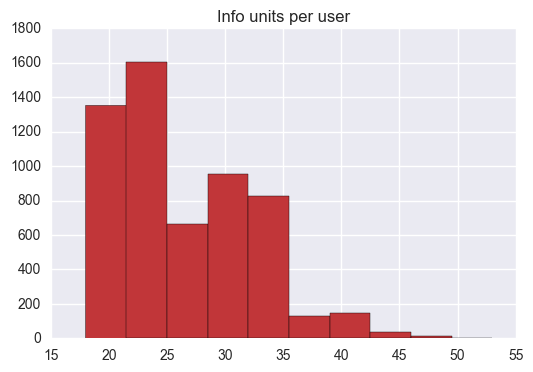

In [198]:
data['Info_count'].hist()
plt.title('Info units per user')
plt.show()

Теперь можно посмотреть, как зависит количество заполненных пунктов в анкете (то, что мы только что посчитали), от возраста, местонахождения.

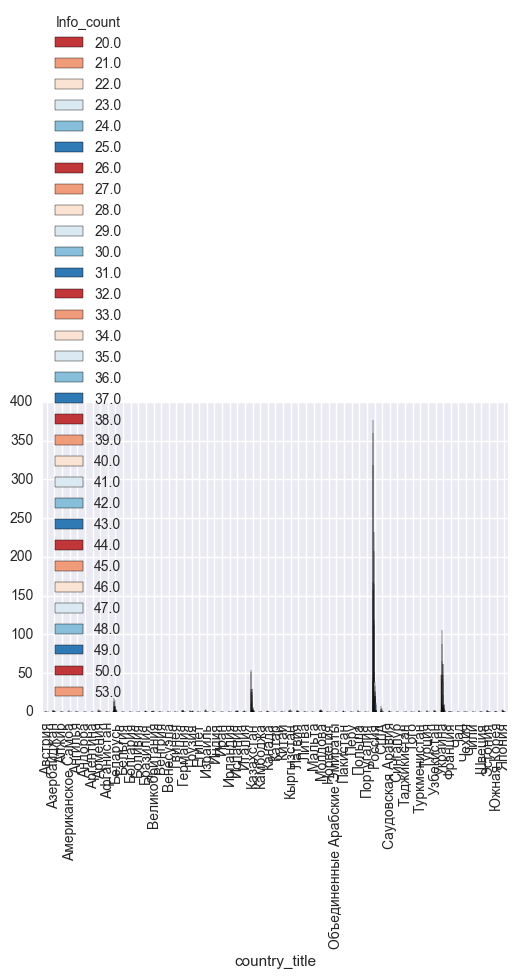

In [199]:
ct = pd.crosstab(data.country_title, data['Info_count'])
ct.plot(kind='bar')

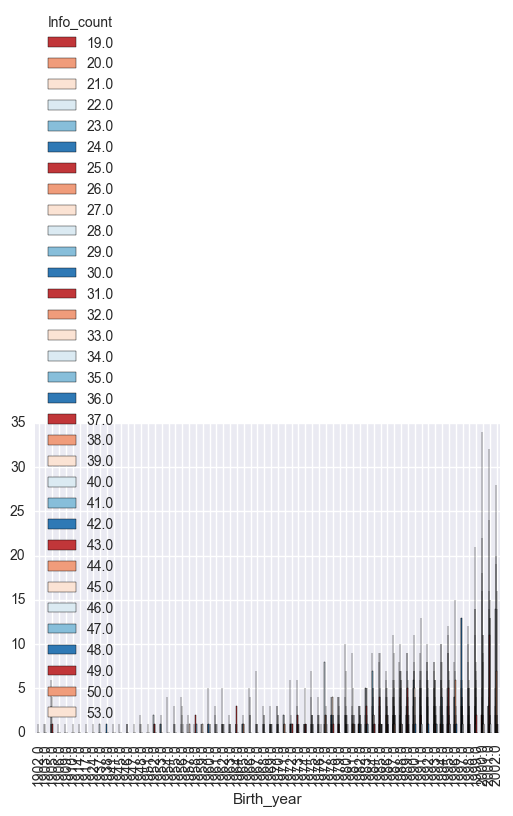

In [127]:
ct = pd.crosstab(data.Birth_year, data['Info_count'])
ct.plot(kind='bar')

Видим, что удобнее разбить годы рождения на интервалы. Для этого создадим новый признак - "Year_category" из 6 значений.
до 1960, 1960-70, 1971-1980, 1981-90, 1991-2000, 2001 и более

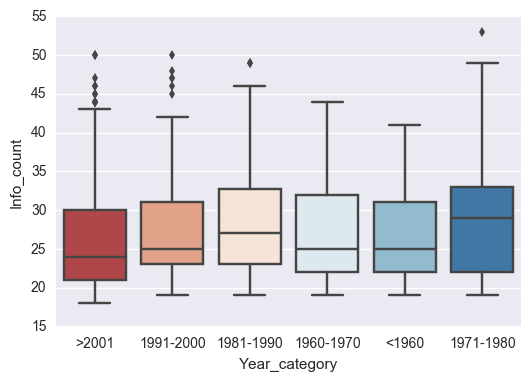

In [201]:
def year_category(year):
    return '<1960' if year < 1960\
            else '1960-1970' if year < 1971 \
            else '1971-1980' if year < 1981\
            else '1981-1990' if year < 1991\
            else '1991-2000' if year < 2001\
            else ">2001"

data['Year_category'] = data['Birth_year'].apply(year_category)
sns.boxplot(x='Year_category', y='Info_count', data=data)

In [202]:
ct = pd.crosstab(data.Year_category, data(data['can_post1']== 0 & data['can_post1'] == 1))
ct.plot(kind='bar')


KeyError: 'can_post1'

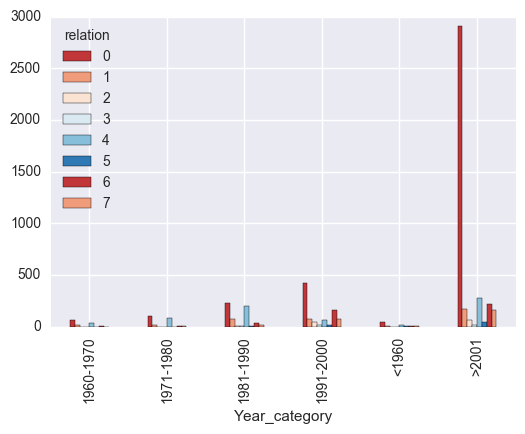

In [203]:
ct = pd.crosstab(data.Year_category, data['relation'])
ct.plot(kind='bar')



Видим, что большинство "свободных" приходится на молодых людей

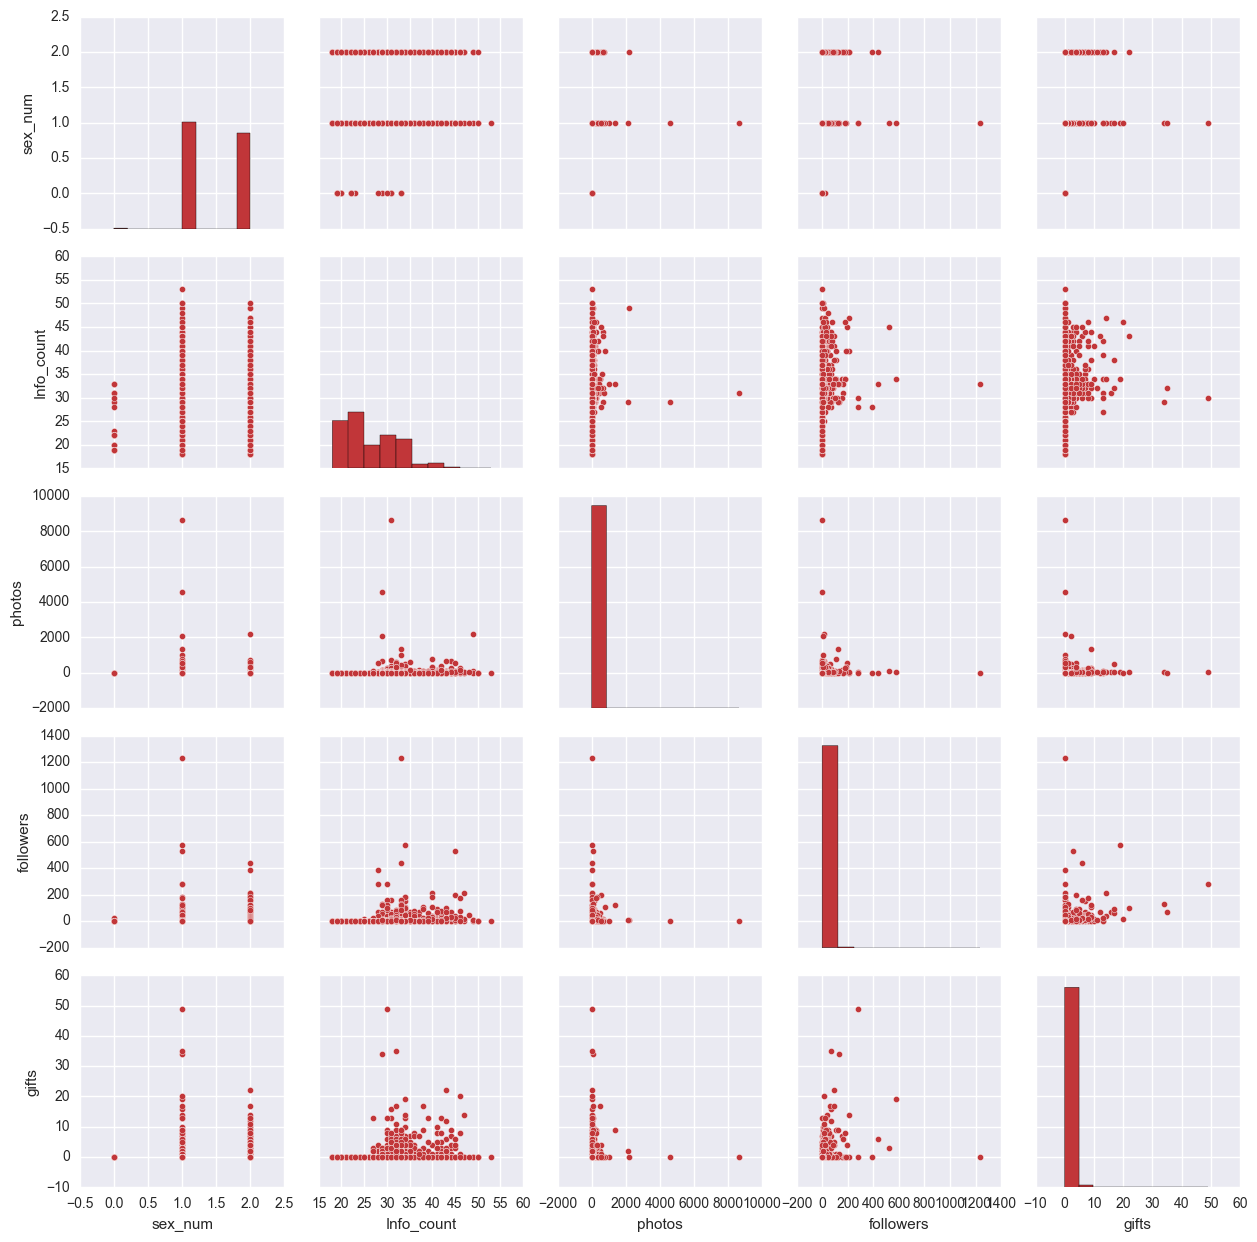

In [208]:
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(data[['sex_num', 'Info_count', 'photos', 'followers','gifts']])


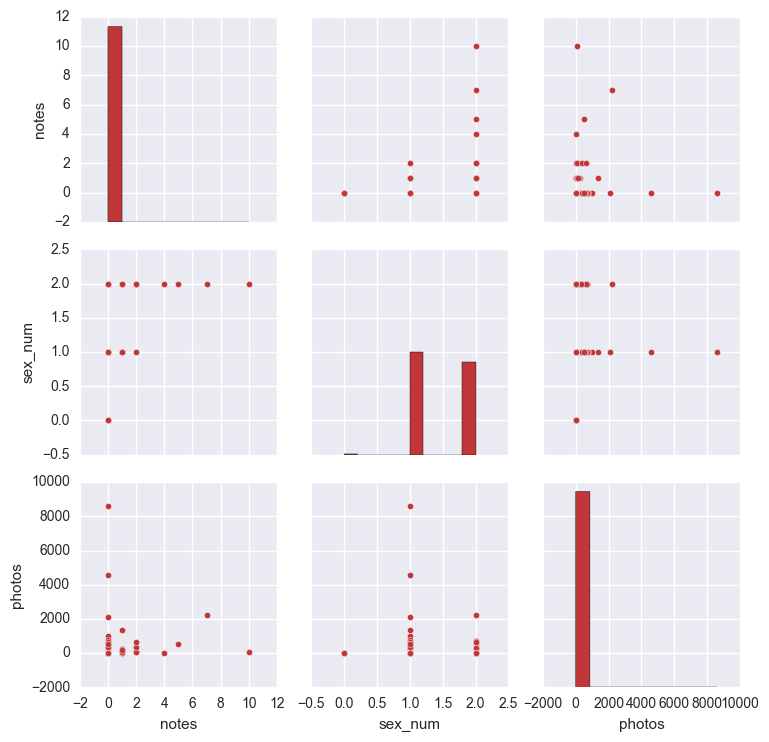

In [209]:
sns.pairplot(data[['notes','sex_num', 'photos']], dropna=True)

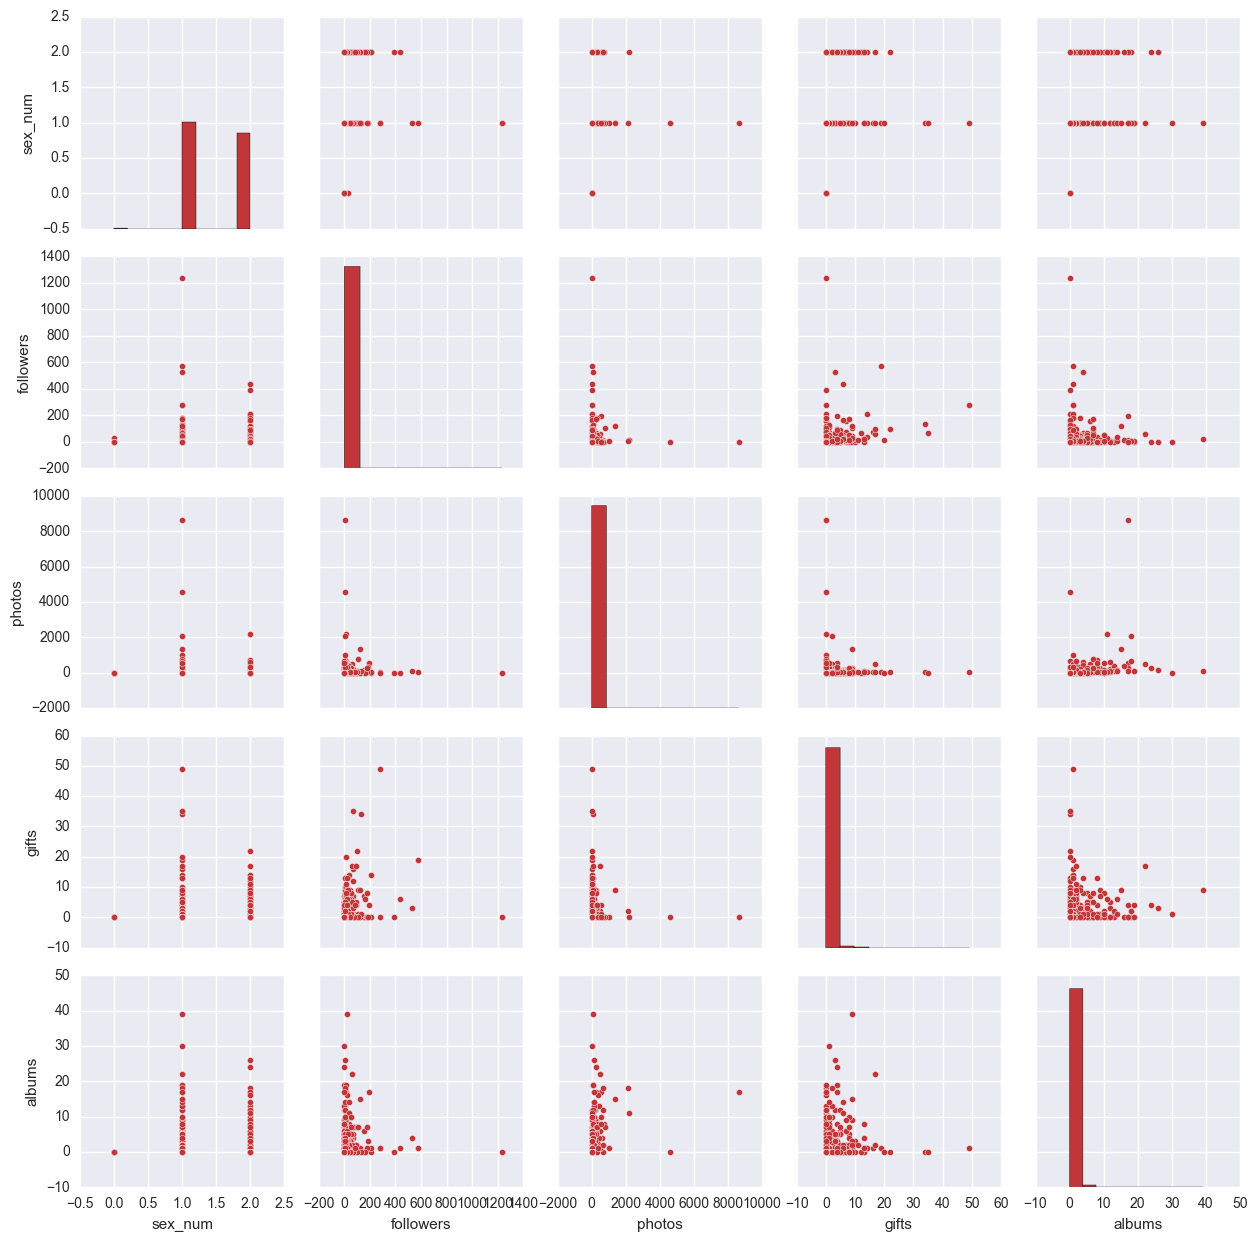

In [210]:
sns.pairplot(data[['sex_num','followers', 'photos','gifts','albums']])


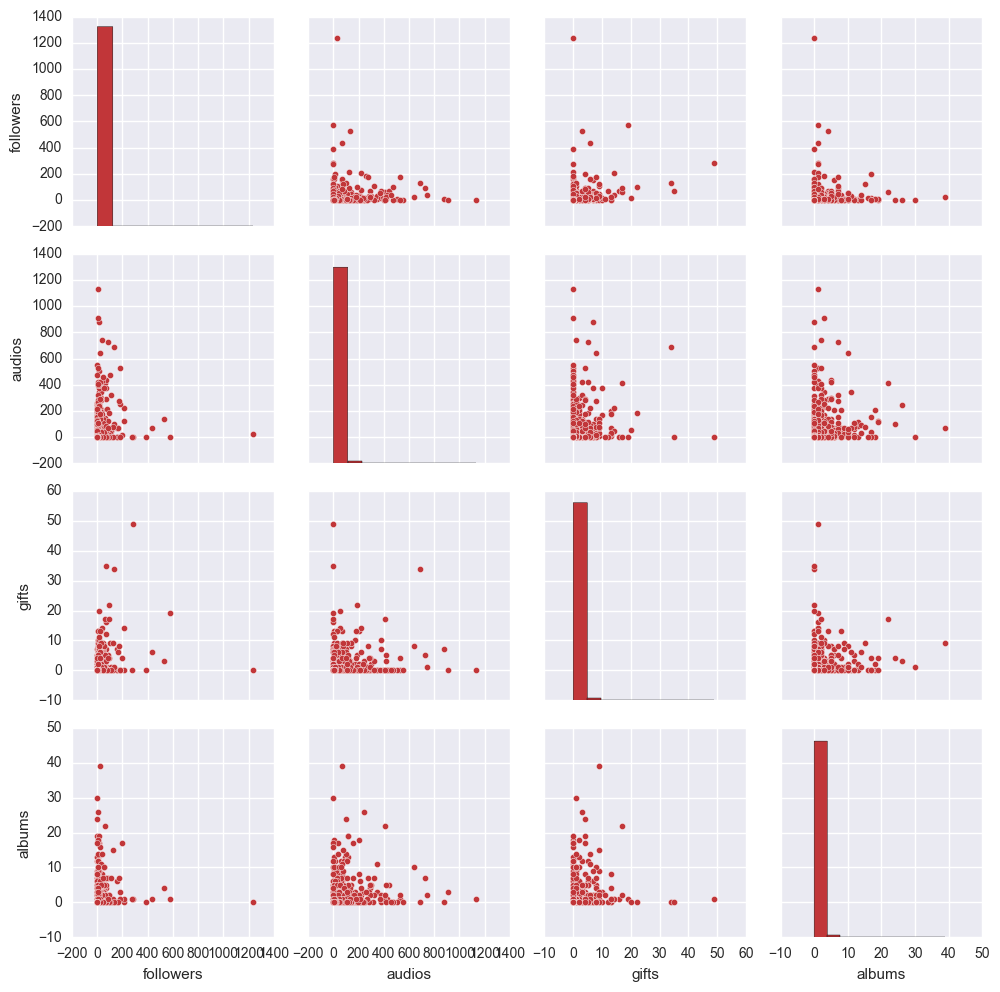

In [211]:
sns.pairplot(data[['followers','audios','gifts','albums']])


In [205]:
data.corr() #до fillna медианой

,online,city,graduation,online_mobile,university,online_app,videos,notes,audios,photos,...,date,duration,status_audio_id,owner_id,genre_id,album_id,no_search,Info_count,sex_num,Birth_year
online,1.000000,-0.036370,0.027056,NaN,-0.016718,NaN,-0.022074,-0.053292,-0.031544,0.000670,...,-0.015854,0.031352,-0.010098,0.040210,0.050501,NaN,NaN,0.033182,-0.000319,0.069618
city,-0.036370,1.000000,-0.005242,NaN,0.220430,-0.113284,0.017825,-0.032268,0.323732,-0.033780,...,0.145655,-0.062829,0.169310,-0.115119,0.231259,NaN,NaN,0.015727,0.047760,0.125780
graduation,0.027056,-0.005242,1.000000,NaN,0.060818,-0.013705,0.024931,0.013944,0.128089,-0.022435,...,0.287905,0.065799,0.270183,0.039921,0.508795,NaN,NaN,-0.030882,0.040057,0.612237
online_mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
university,-0.016718,0.220430,0.060818,NaN,1.000000,-0.006912,0.026036,0.211808,0.057217,0.004059,...,0.031682,-0.023723,0.025543,-0.044015,0.132306,-0.255532,NaN,0.150700,0.005947,0.011549
online_app,NaN,-0.113284,-0.013705,NaN,-0.006912,1.000000,-0.010234,-0.019665,-0.008418,-0.025682,...,0.212820,-0.201267,0.248803,0.182820,-0.214888,NaN,NaN,-0.007738,0.060026,-0.052356
videos,-0.022074,0.017825,0.024931,NaN,0.026036,-0.010234,1.000000,0.348510,0.455513,0.122425,...,0.088852,0.045311,0.107323,-0.118092,-0.043087,1.000000,NaN,0.092768,0.069633,0.022378
notes,-0.053292,-0.032268,0.013944,NaN,0.211808,-0.019665,0.348510,1.000000,0.160545,0.138387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122453,0.054337,-0.004348
audios,-0.031544,0.323732,0.128089,NaN,0.057217,-0.008418,0.455513,0.160545,1.000000,0.083027,...,0.079017,0.063442,0.088633,-0.117303,-0.111509,0.999322,NaN,0.164119,0.033043,0.036363
photos,0.000670,-0.033780,-0.022435,NaN,0.004059,-0.025682,0.122425,0.138387,0.083027,1.000000,...,0.109392,-0.087641,0.144282,-0.074326,-0.005842,0.500000,NaN,0.042449,-0.046202,-0.019529


In [206]:
data = data.fillna(data.median(axis=0), axis=0)

In [207]:
data.corr() #после fillna медианой

,online,city,graduation,online_mobile,university,online_app,videos,notes,audios,photos,...,date,duration,status_audio_id,owner_id,genre_id,album_id,no_search,Info_count,sex_num,Birth_year
online,1.000000,-0.020253,0.009750,NaN,-0.016778,0.070782,-0.013595,-0.031148,-0.019050,-0.000154,...,-0.012856,0.009111,-0.013423,0.010931,0.014637,0.006622,NaN,0.033182,-0.000319,0.042561
city,-0.020253,1.000000,-0.040653,NaN,0.275139,-0.012275,0.008975,-0.003534,0.084987,-0.002248,...,0.005180,-0.003239,0.007101,-0.003045,0.024384,-0.002252,NaN,0.124265,0.013411,0.006337
graduation,0.009750,-0.040653,1.000000,NaN,-0.006078,0.012926,-0.005245,-0.011963,0.010936,-0.008514,...,0.011852,0.002229,0.012255,0.002999,0.020434,0.001527,NaN,-0.098535,0.011748,0.169842
online_mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
university,-0.016778,0.275139,-0.006078,NaN,1.000000,-0.021112,0.013345,0.117383,0.029477,0.001804,...,-0.003369,0.000060,-0.006154,-0.004423,0.048722,-0.003120,NaN,0.150666,0.005925,0.003854
online_app,0.070782,-0.012275,0.012926,NaN,-0.021112,1.000000,-0.005187,-0.010358,-0.007298,-0.010607,...,0.017662,-0.010107,0.019720,-0.012006,-0.016842,-0.007601,NaN,0.003751,0.038832,0.010623
videos,-0.013595,0.008975,-0.005245,NaN,0.013345,-0.005187,1.000000,0.353108,0.482910,0.139118,...,0.006962,-0.001143,0.007795,-0.007133,-0.005349,0.004509,NaN,0.177492,0.043669,0.000141
notes,-0.031148,-0.003534,-0.011963,NaN,0.117383,-0.010358,0.353108,1.000000,0.170807,0.143578,...,0.002613,-0.001494,0.002836,-0.001753,-0.002510,-0.001136,NaN,0.092035,0.032522,-0.005211
audios,-0.019050,0.084987,0.010936,NaN,0.029477,-0.007298,0.482910,0.170807,1.000000,0.106614,...,0.005511,0.008102,0.006098,-0.012924,-0.005903,0.022232,NaN,0.256994,0.024434,0.002579
photos,-0.000154,-0.002248,-0.008514,NaN,0.001804,-0.010607,0.139118,0.143578,0.106614,1.000000,...,0.004303,-0.002749,0.004968,-0.003259,-0.002844,-0.002033,NaN,0.089376,-0.024071,-0.002267


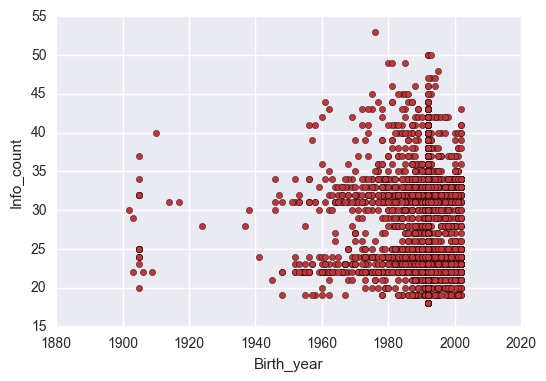

In [212]:

data.plot(x='Birth_year', y='Info_count', kind='scatter')

В среднем заметно, то наибольшее количество информации о себе указывают лица 1990-х гг рождения

In [213]:
data['Info_count'].describe()

count    5733.000000
mean       26.220827
std         5.788287
min        18.000000
25%        22.000000
50%        24.000000
75%        31.000000
max        53.000000
Name: Info_count, dtype: float64

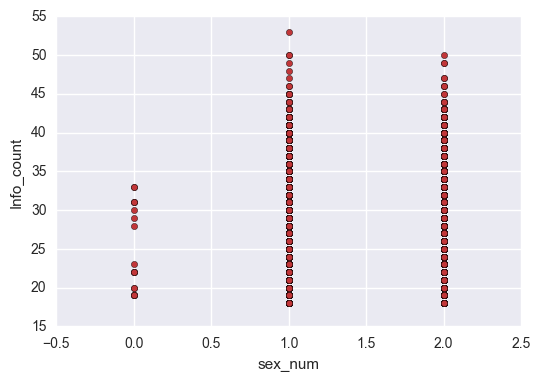

In [150]:
#data = data.fillna(data.median(axis=0), axis=0)
data.plot(x='sex_num', y='Info_count', kind='scatter')

Видно, что у женщин в среднем поменьше признаков указано